# **💡Data Preprocessing**

## import library

In [ ]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data 

In [ ]:
from glob import glob

PATH = '/content/drive/MyDrive/[구운자현] I_am_Seller/dataset'

In [ ]:
# 데이터 불러오기
customer =  pd.read_csv(f"{PATH}/olist_customers_dataset.csv")
geo =  pd.read_csv(f"{PATH}/olist_geolocation_dataset.csv")
items =  pd.read_csv(f"{PATH}/olist_order_items_dataset.csv")
payments = pd.read_csv(f"{PATH}/olist_order_payments_dataset.csv")
reviews = pd.read_csv(f"{PATH}/olist_order_reviews_dataset.csv")
orders = pd.read_csv(f"{PATH}/olist_orders_dataset.csv")
products = pd.read_csv(f"{PATH}/olist_products_dataset.csv")
sellers =  pd.read_csv(f"{PATH}/olist_sellers_dataset.csv")
name =  pd.read_csv(f"{PATH}/product_category_name_translation.csv")

## 지리 분석용 데이터 전처리

브라질 국경 밖의 위-경도 제거 

<Axes: xlabel='geolocation_lng', ylabel='geolocation_lat'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


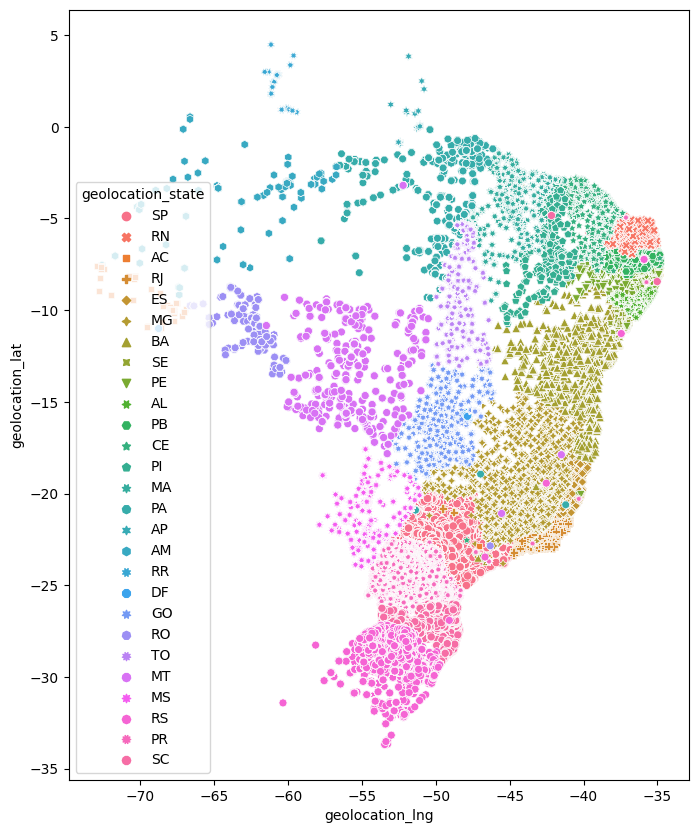

In [ ]:
#아웃라이어 제거 
geo = geo[geo['geolocation_lat'] <= 5.27438888]
geo = geo[geo['geolocation_lng'] >= -73.98283055]
geo = geo[geo['geolocation_lat'] >= -33.75116944]
geo = geo[geo['geolocation_lng'] <=  -34.79314722]

fig = plt.figure(figsize=(8,10))
sns.scatterplot(data = geo ,x='geolocation_lng', y='geolocation_lat', hue  ='geolocation_state', style = 'geolocation_state')

숫자형으로 zip_code_prefix 자료형 변경

In [ ]:
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geo_code = geo[['geolocation_zip_code_prefix']].apply(pd.value_counts).sum(1)
# sum(0)했을때는 전체합계가 나온다 !

In [ ]:
geo = geo.assign(zip_code_count = geo['geolocation_zip_code_prefix'].map(geo_code)).drop_duplicates(['geolocation_zip_code_prefix'])
geo = geo.sort_values(by='zip_code_count', ascending = False)
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,zip_code_count
470805,24220,-22.905817,-43.106989,niteroi,RJ,1146
470806,24230,-22.911270,-43.105151,niterói,RJ,1102
645450,38400,-18.915960,-48.278974,uberlandia,MG,965
594039,35500,-20.146615,-44.892592,divinopolis,MG,907
256708,11680,-23.431627,-45.077229,ubatuba,SP,879


In [ ]:
geo.shape

(19010, 6)

### (지리분석) Customers - Sellers State Dataset 
- 판매자와 구매자의 위치를 구한 데이터 
- 위경도 데이터 추가가 

#### 주문상품에 대한 데이터 모두 Merge

In [ ]:
df_customer_order = pd.merge(orders, customer, on = 'customer_id', how = 'inner')
df_seller_item = pd.merge(items , sellers, on='seller_id', how = 'inner')
df_customer_seller_prefix = pd.merge(df_customer_order, df_seller_item, on = 'order_id', how ='inner')

In [ ]:
total = pd.merge(products, df_customer_seller_prefix, on ='product_id', how='inner')
total = pd.merge(total, name , on='product_category_name', how='inner')

In [ ]:
total.drop('product_category_name_english', axis='columns')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,customer_city,customer_state,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,mogi-guacu,SP,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,5fa78e91b5cb84b6a8ccc42733f95742,...,sao paulo,SP,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78,1026,sao paulo,SP
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,048cc42e03ca8d43c729adf6962cb348,...,santana de parnaiba,SP,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78,1026,sao paulo,SP
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,a84a0bd528e053f6b266e21bb1111e3f,...,cachoeiras de macacu,RJ,1,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45,25645,petropolis,RJ
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,rio de janeiro,RJ,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13,13030,campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,d4e8d3bb5e3673ed68ac154fe86de946,...,passo fundo,RS,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11,12327,jacarei,SP
111019,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,9c782cb7854e5dfa91927cfca8949eb8,...,rio de janeiro,RJ,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11,12327,jacarei,SP
111020,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,porto alegre,RS,1,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP
111021,1dceebcc5f23c02ea23e16d5bedca000,cds_dvds_musicais,47.0,117.0,2.0,550.0,35.0,15.0,25.0,615ca9b2afeaf5644ae8cef64797132e,...,porto alegre,RS,2,4e922959ae960d389249c378d1c939f5,2017-08-17 04:25:31,45.00,16.11,12327,jacarei,SP


In [ ]:
total['product_category_name'] = total['product_category_name_english']

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     111023 non-null  object 
 1   product_category_name          111023 non-null  object 
 2   product_name_lenght            111023 non-null  float64
 3   product_description_lenght     111023 non-null  float64
 4   product_photos_qty             111023 non-null  float64
 5   product_weight_g               111022 non-null  float64
 6   product_length_cm              111022 non-null  float64
 7   product_height_cm              111022 non-null  float64
 8   product_width_cm               111022 non-null  float64
 9   order_id                       111023 non-null  object 
 10  customer_id                    111023 non-null  object 
 11  order_status                   111023 non-null  object 
 12  order_purchase_timestamp      

#### seller_customer_location Dataset 
- geo 데이터와 merge 

In [ ]:
df_loc = total[['seller_zip_code_prefix','customer_zip_code_prefix']]
df_loc.shape

(111023, 2)

In [ ]:
seller_customer_loc = pd.merge(df_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'seller_zip_code_prefix'}) , on = 'seller_zip_code_prefix', how='inner')

In [ ]:
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'seller_lat',
                            'geolocation_lng':'seller_lng',
                            'geolocation_city':'seller_city',
                            'geolocation_state':'seller_state'
                            })
seller_customer_loc.shape

(110771, 7)

In [ ]:
seller_customer_loc = pd.merge(seller_customer_loc, geo.rename(columns = {'geolocation_zip_code_prefix':'customer_zip_code_prefix'}) , on = 'customer_zip_code_prefix', how='inner')
seller_customer_loc = seller_customer_loc.rename(columns = {
                            'geolocation_lat':'customer_lat',
                            'geolocation_lng':'customer_lng',
                            'geolocation_city':'customer_city',
                            'geolocation_state':'customer_state'
                            })
seller_customer_loc.shape

(110475, 12)

In [ ]:
seller_customer_loc.head()

,seller_zip_code_prefix,customer_zip_code_prefix,seller_lat,seller_lng,seller_city,seller_state,zip_code_count_x,customer_lat,customer_lng,customer_city,customer_state,zip_code_count_y
0,3694,13848,-23.537922,-46.477696,sao paulo,SP,112,-22.331249,-46.92258,mogi guaçu,SP,194
1,22230,13848,-22.937816,-43.176199,rio de janeiro,RJ,420,-22.331249,-46.92258,mogi guaçu,SP,194
2,5849,13848,-23.651115,-46.755211,sao paulo,SP,88,-22.331249,-46.92258,mogi guaçu,SP,194
3,14050,13848,-21.171217,-47.819418,ribeirao preto,SP,169,-22.331249,-46.92258,mogi guaçu,SP,194
4,35570,13848,-20.474084,-45.424321,formiga,MG,445,-22.331249,-46.92258,mogi guaçu,SP,194


In [ ]:
seller_customer_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110474
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   seller_zip_code_prefix    110475 non-null  int64  
 1   customer_zip_code_prefix  110475 non-null  int64  
 2   seller_lat                110475 non-null  float64
 3   seller_lng                110475 non-null  float64
 4   seller_city               110475 non-null  object 
 5   seller_state              110475 non-null  object 
 6   zip_code_count_x          110475 non-null  int64  
 7   customer_lat              110475 non-null  float64
 8   customer_lng              110475 non-null  float64
 9   customer_city             110475 non-null  object 
 10  customer_state            110475 non-null  object 
 11  zip_code_count_y          110475 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 11.0+ MB


#### 판매자와 주문자 간 거리 비교 
- 판매자는 어느 도시에서 주로 물건을 올리는지

haversine distance 계산
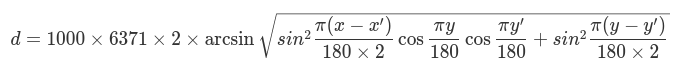

- 지구의 곡률을 고려한 위경도 간 거리 계산법 
- 소비자와 판매자 간의 거리 차이를 알아본다. 

In [ ]:
from math import radians , cos, sin, asin, sqrt 
from tqdm import tqdm

def geo_dist(x1, y1, x2, y2 ):
    x1, y1, x2, y2 = map(radians , [x1,y1,x2,y2])
    d_lng = x2 - x1
    d_lat = y2 - y1
    a = sin(d_lat/2)**2 + cos(y1) * cos(y2) * sin(d_lng/2)**2
    dist = round((2*asin(sqrt(a))*6371*1000)/1000,3)
    return dist 

In [ ]:
A = seller_customer_loc['seller_lng']
B = seller_customer_loc['seller_lat']
C = seller_customer_loc['customer_lng']
D = seller_customer_loc['customer_lat']

seller_customer_loc['dist']  = seller_customer_loc['seller_lat']

for idx, v in tqdm(enumerate(zip(A,B,C,D))):
    seller_customer_loc['dist'].loc[idx] = geo_dist(*v)

0it [00:00, ?it/s]<ipython-input-22-59e343f5fd06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_customer_loc['dist'].loc[idx] = geo_dist(*v)
110475it [00:43, 2524.02it/s]


In [ ]:
seller_customer_loc.dist.head()

0    141.699
1    390.351
2    147.759
3    158.799
4    258.265
Name: dist, dtype: float64

### 판매자-소비자 간 거리 데이터 저장 

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     111023 non-null  object 
 1   product_category_name          111023 non-null  object 
 2   product_name_lenght            111023 non-null  float64
 3   product_description_lenght     111023 non-null  float64
 4   product_photos_qty             111023 non-null  float64
 5   product_weight_g               111022 non-null  float64
 6   product_length_cm              111022 non-null  float64
 7   product_height_cm              111022 non-null  float64
 8   product_width_cm               111022 non-null  float64
 9   order_id                       111023 non-null  object 
 10  customer_id                    111023 non-null  object 
 11  order_status                   111023 non-null  object 
 12  order_purchase_timestamp      

In [ ]:
PATH

'/content/drive/MyDrive/[구운자현] I_am_Seller/dataset'

In [ ]:
seller_customer_loc.to_csv(f'{PATH}/Merged/geo_dist_olist.csv', index=False)

### 판매자와 주문 상품에 대한 ALL 데이터 저장  

In [ ]:
total.to_csv(f'{PATH}/Merged/Data_all_v2.csv', index=False)

### (상품 및 매출 분석) Olist Orders Dataset 



In [ ]:
# 데이터 불러오기
raw_path = PATH
customer = pd.read_csv(raw_path + '/olist_customers_dataset.csv')
geolocation = pd.read_csv(raw_path + '/olist_geolocation_dataset.csv')
order_items = pd.read_csv(raw_path + '/olist_order_items_dataset.csv')
order_payments = pd.read_csv(raw_path + '/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(raw_path + '/olist_order_reviews_dataset.csv')
orders = pd.read_csv(raw_path + '/olist_orders_dataset.csv')
olist_products = pd.read_csv(raw_path + '/olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + '/olist_sellers_dataset.csv')

In [ ]:
# column명 변경
geolocation.columns = ['customer_zip_code_prefix', 
                       'geolocation_lat', 
                       'geolocation_lng',
                       'geolocation_city', 
                       'geolocation_state']

olist_sellers.columns = ['seller_id', 
                         'customer_zip_code_prefix', 
                         'seller_city', 
                         'seller_state']

In [ ]:
# 필요한 데이터 합치기
df_all = pd.DataFrame()
df_all = orders.merge(order_items, on='order_id', how='outer')
df_all = df_all.merge(order_payments, on='order_id', how='outer')
df_all = df_all.merge(order_reviews, on='order_id', how='outer')
df_all = df_all.merge(olist_sellers, on='seller_id', how='outer')
df_all = df_all.merge(olist_products, on='product_id', how='outer')
df_all.shape

(119143, 35)

In [ ]:
# yearmonth 변수 만들기
df_all['yearmonth'] = df_all['order_purchase_timestamp'].map(lambda x:x[:7])
df_all['order_purchase_timestamp'] = pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['year'] = df_all['order_purchase_timestamp'].dt.year
df_all['month'] = df_all['order_purchase_timestamp'].dt.month
df_all['hour'] = df_all['order_purchase_timestamp'].dt.hour
df_all[['yearmonth', 'year', 'month', 'hour']]

,yearmonth,year,month,hour
0,2017-10,2017,10,10
1,2017-10,2017,10,10
2,2017-10,2017,10,10
3,2017-08,2017,8,18
4,2017-08,2017,8,18
...,...,...,...,...
119138,2018-07,2018,7,10
119139,2017-03,2017,3,19
119140,2018-07,2018,7,9
119141,2018-05,2018,5,21


In [ ]:
# 카테고리 딕셔너리를 이용하여 카테고리 영문으로 바꾸기
category_dict = {'perfumaria': 'perfumery', 'artes': 'art', 'esporte_lazer': 'sports_leisure', 'bebes': 'baby', 
                 'utilidades_domesticas': 'housewares', 'instrumentos_musicais': 'musical_instruments', 'cool_stuff': 'cool_stuff', 
                 'moveis_decoracao': 'furniture_decor', 'eletrodomesticos': 'home_appliances', 'brinquedos': 'toys', 
                 'cama_mesa_banho': 'bed_bath_table', 'construcao_ferramentas_seguranca': 'construction_tools_safety', 
                 'informatica_acessorios': 'computers_accessories', 'beleza_saude': 'health_beauty', 'malas_acessorios': 'luggage_accessories', 
                 'ferramentas_jardim': 'garden_tools', 'moveis_escritorio': 'office_furniture', 'automotivo': 'auto', 'eletronicos': 'electronics', 
                 'fashion_calcados': 'fashion_shoes', 'telefonia': 'telephony', 'papelaria': 'stationery', 
                 'fashion_bolsas_e_acessorios': 'fashion_bags_accessories', 'pcs': 'computers', 'casa_construcao': 'home_construction', 
                 'relogios_presentes': 'watches_gifts', 'construcao_ferramentas_construcao': 'construction_tools_construction', 
                 'pet_shop': 'pet_shop', 'eletroportateis': 'small_appliances', 'agro_industria_e_comercio': 'agro_industry_and_commerce', 
                 'moveis_sala': 'furniture_living_room', 'sinalizacao_e_seguranca': 'signaling_and_security', 'climatizacao': 'air_conditioning', 
                 'consoles_games': 'consoles_games', 'livros_interesse_geral': 'books_general_interest', 
                 'construcao_ferramentas_ferramentas': 'costruction_tools_tools', 'fashion_underwear_e_moda_praia': 'fashion_underwear_beach', 
                 'fashion_roupa_masculina': 'fashion_male_clothing', 
                 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_dining_laundry_garden_furniture', 
                 'industria_comercio_e_negocios': 'industry_commerce_and_business', 'telefonia_fixa': 'fixed_telephony', 
                 'construcao_ferramentas_iluminacao': 'construction_tools_lights', 'livros_tecnicos': 'books_technical', 
                 'eletrodomesticos_2': 'home_appliances_2', 'artigos_de_festas': 'party_supplies', 'bebidas': 'drinks', 
                 'market_place': 'market_place', 'la_cuisine': 'la_cuisine', 'construcao_ferramentas_jardim': 'costruction_tools_garden', 
                 'fashion_roupa_feminina': 'fashio_female_clothing', 'casa_conforto': 'home_confort', 'audio': 'audio', 
                 'alimentos_bebidas': 'food_drink', 'musica': 'music', 'alimentos': 'food', 'tablets_impressao_imagem': 'tablets_printing_image', 
                 'livros_importados': 'books_imported', 'portateis_casa_forno_e_cafe': 'small_appliances_home_oven_and_coffee', 
                 'fashion_esporte': 'fashion_sport', 'artigos_de_natal': 'christmas_supplies', 
                 'fashion_roupa_infanto_juvenil': 'fashion_childrens_clothes', 'dvds_blu_ray': 'dvds_blu_ray', 
                 'artes_e_artesanato': 'arts_and_craftmanship', 'moveis_quarto': 'furniture_bedroom', 'cine_foto': 'cine_photo', 
                 'fraldas_higiene': 'diapers_and_hygiene', 'flores': 'flowers', 'casa_conforto_2': 'home_comfort_2', 
                 'seguros_e_servicos': 'security_and_services', 'moveis_colchao_e_estofado': 'furniture_mattress_and_upholstery', 
                 'cds_dvds_musicais': 'cds_dvds_musicals'}
df_all = df_all.replace(to_replace=category_dict)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  object        
 5   order_delivered_carrier_date   117057 non-null  object        
 6   order_delivered_customer_date  115722 non-null  object        
 7   order_estimated_delivery_date  119143 non-null  object        
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

In [ ]:
df_all.to_csv(f'{PATH}/Merged/Data_all_v1.csv', index=False)